In [1]:
!cd .. && mkdir build
!cd ../../build/ && rm -rf *
!cd ../../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/rociodcasco/miniconda3/envs/tp2/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/rociodcasco/miniconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/mnt/c/Users/Rocío/Documents/GitHub/metnum_

In [2]:
# verifico version de python e importo metnum
!pwd
!python --version

import sys
import os

p = os.path.abspath('../')
sys.path.insert(1, p)

import metnum

/mnt/c/Users/Rocío/Documents/GitHub/metnum_tp2/notebooks/VariaciónMuestra
Python 3.6.5 :: Anaconda, Inc.


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

#Extraer dataset
df_train = pd.read_csv("../../data/train.csv")


In [4]:
# shuffle
df_train = df_train.sample(frac = 1, random_state=43)


In [5]:
def predict(X_train, y_train, X_val, alpha, k, con_pca):
    
    clf = metnum.KNNClassifier(k)
    
    if con_pca:
        
        pca = metnum.PCA(alpha)
        pca.fit(X_train)
        
        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    return y_pred

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time

acc_pred = []
prec_pred = []
recall_pred = []
total = len(df_train)

durationPerIteration = []


#por porcentajes
cantidadImg = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

totalTimeSt = time.time()
for i in cantidadImg:
    print(f"aber: {i/100}")
    #Corto la muestra
    sample = df_train[:int((i/100)*total)]
    
    # Uso values para mandar todo a arrays de numpy
    X = sample[sample.columns[1:]].values
    y = sample["label"].values.reshape(-1, 1)
    
    #Separo train de validacion
    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]
    
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    #kNN con alpha y k optimos _en teoria_ y con PCA
    start = time.time()
    y_pred = predict(X_train, y_train, X_val, 40, 5, True)
    finish = time.time()
    
    #guardo las metricas
    acc = accuracy_score(y_val, y_pred)
    acc_pred.append(acc)
   
    prec = precision_score(y_val, y_pred, average='macro')
    prec_pred.append(prec)
    
    recall = recall_score(y_val, y_pred, average='macro')
    recall_pred.append(recall)
    
    #guardo el tiempo
    totalTime = finish-start
    durationPerIteration.append(totalTime)
    print(f"El tiempo de ejecución es: {totalTime}")
    
totalTimeF = time.time()

print(f"Tiempo total de ejecucion: {totalTimeF - totalTimeSt}")

aber: 0.1
Ahora tengo 3360 instancias de entrenamiento y 840 de validación
El tiempo de ejecución es: 0.47138357162475586
aber: 0.2
Ahora tengo 6720 instancias de entrenamiento y 1680 de validación
El tiempo de ejecución es: 1.1416943073272705
aber: 0.3
Ahora tengo 10080 instancias de entrenamiento y 2520 de validación
El tiempo de ejecución es: 2.3624279499053955
aber: 0.4
Ahora tengo 13440 instancias de entrenamiento y 3360 de validación
El tiempo de ejecución es: 3.447324752807617
aber: 0.5
Ahora tengo 16800 instancias de entrenamiento y 4200 de validación
El tiempo de ejecución es: 5.262409210205078
aber: 0.6
Ahora tengo 20160 instancias de entrenamiento y 5040 de validación
El tiempo de ejecución es: 6.054417133331299
aber: 0.7
Ahora tengo 23519 instancias de entrenamiento y 5880 de validación
El tiempo de ejecución es: 8.663443803787231
aber: 0.8
Ahora tengo 26880 instancias de entrenamiento y 6720 de validación
El tiempo de ejecución es: 10.299560070037842
aber: 0.9
Ahora tengo 

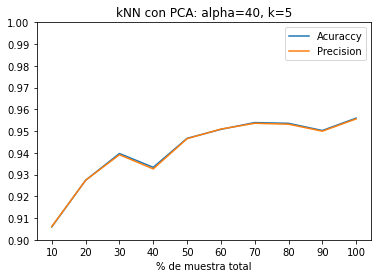

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

plt.plot(cantidadImg, acc_pred)
plt.plot(cantidadImg, prec_pred)

plt.xlabel('% de muestra total')
plt.title("kNN con PCA: alpha=40, k=5")
plt.legend(["Acuraccy", "Precision"])

plt.xticks(cantidadImg)
plt.yticks([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99, 1])

plt.savefig("METRICSTest16.jpg")
plt.show()

In [8]:
todos = []

for i in range(len(durationPerIteration)):
    aber = durationPerIteration[i] / (i+1)
    todos.append(aber)
    
print(todos)

print(sum(todos)/10)
    


[0.47138357162475586, 0.5708471536636353, 0.7874759833017985, 0.8618311882019043, 1.0524818420410156, 1.009069522221883, 1.2376348291124617, 1.2874450087547302, 1.3645943270789251, 1.515724539756775]
1.0158487965757885


In [9]:
maximoACC = max(acc_pred)
maximoPREC = max(prec_pred)
indACC = acc_pred.index(maximoACC)
indPREC = prec_pred.index(maximoPREC)

print(f"El maximo Accuracy es {maximoACC} y se alcanza con el {cantidadImg[indACC]}% de la muestra total")
print(f"La máxima Precision es {maximoPREC} y se alcanza con el {cantidadImg[indPREC]}% de la muestra total")

El maximo Accuracy es 0.955952380952381 y se alcanza con el 100% de la muestra total
La máxima Precision es 0.9556048769609792 y se alcanza con el 100% de la muestra total


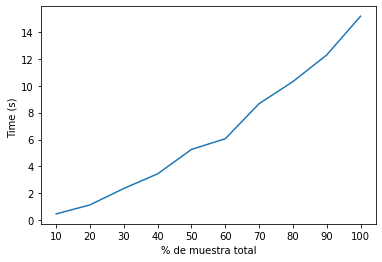

In [10]:
plt.plot(cantidadImg, durationPerIteration)

plt.xlabel('% de muestra total')
plt.ylabel("Time (s) ")

plt.xticks(cantidadImg)

plt.savefig("TIMETest16.jpg")
plt.show()

In [11]:
import pandas as pd
# cantidadImg, accuracy, precision, time

aber = {'cantidadImg': cantidadImg, 'accuracy': acc_pred, 'precision': prec_pred, 'time': durationPerIteration}

xd = pd.DataFrame(aber)
xd.to_csv('datosTest16.csv')